# Chapter 1 - Data Sourcing

<div>
<img src="../imgs/product-proliferation.png" width="750"/>
<figcaption><em>The modern data landscape has so much data...no, really—SO much data. Which data should you use?</em></figcaption>
<div>

### 1.0. Preface: why source good data? 

* Analysis for any research project begins with data sourcing; without any data, there's no tests to run, no trends to identify, no hypotheses to validate, etc. 

* But, the modern data landscape is vast and can be overwhelming—look up "X + dataset" for almost topic, and you'll likely find a multitude of resources published by private organizations, government agencies, licensed data vendors, open-source groups, etc. Does it matter whose data you go with? 

* **Absolutely** — identifying and sourcing quality data is essnetial to the research process. If conducting analyses is like cooking, sourcing data is like acquiring ingredients—whether you're following a recipe or not, things will likely not turn out well if the base inputs are of poor quality. 


### 1.1. Defining "data sourcing"

Data sourcing is the process of: 

* ***identifying***; 
  
* ***assessing***; and,
  
* ***selecting***

a data resource to work with. Even for the same statistic, data resources can differ by basic attributes like values, author, purpose and more meta factors like availability, structure, representativeness, etc. 

Purposeful data sourcing is often overlooked in favor of convenience (i.e., using the first available and/or most popular dataset), but as we'll see, data sourcing decisions determine data attributes—which can ultimately impact downstream analysis. 

### 1.2. Issues in data sourcing

##### 1.2.1. *Deciding between multiple data authors*

Look up "US GDP data" in your web browser of choice. 

<div>
<img src="../imgs/gdp_webquery.png" width="500"/>
<div> 
<br>

How many potential data sources can you find in just a minute? 10? 20? 100? Is one clearly better than the others? Despite looking up 'US GDP data,' are all sources providing you with the same values in their data stores? Which one would you use in what circumstances?

In a way, all data sourcing practices are trying to solve this exact problem: reasonably decide between multiple data authors. The issues we'll talk about later in this chapter and others are all, in some way, shape, or form, determined by who the data author is (even if it's yourself) and what decisions they chose to make when collecting and crafting the dataset. 

For now, let's explore a few different GDP datasets and consider which one we might choose and why:

In [1]:
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 

In [14]:
""" DATA SOURCING: DIFFERENT DATA AUTHORS """
# when I look up 'US GDP data', the first result is from the Bureau of Economic Advisors (BEA): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
bea_data = pd.read_csv(datasets_dir + 'gdp_bea_q2_2022_adv.csv' , encoding='utf-8')

# how's it structured? is it usable?
print(bea_data.head(10))

  Table 2. Contributions to Percent Change in Real Gross Domestic Product  \
0                                               Line                        
1                                               Line                        
2                                               Line                        
3                                                NaN                        
4                                                  1                        
5                                                NaN                        
6                                                  2                        
7                                                  3                        
8                                                  4                        
9                                                  5                        

                           Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                                 NaN     2019.00     2020.00     2021.00  

In [15]:
# I can also find more GDP data through other official-sounding organizations: 
# e.g., GDP data from the St. Louis Federal Reserve (FRED): 
fred_data = pd.read_csv(datasets_dir + 'gdp_fred.csv' , encoding='utf-8')
print(fred_data.head(10))

        DATE      GDP
0   1/1/1947  243.164
1   4/1/1947  245.968
2   7/1/1947  249.585
3  10/1/1947  259.745
4   1/1/1948  265.742
5   4/1/1948  272.567
6   7/1/1948  279.196
7  10/1/1948  280.366
8   1/1/1949  275.034
9   4/1/1949  271.351


In [17]:
# how about GDP data from a random website? here's some from macrotrends.net:
macrotrends_data  = pd.read_csv(datasets_dir + 'gdp_macrotrends.csv', encoding='utf-8')
print(macrotrends_data.head(10))

                           Macrotrends Data Download Unnamed: 1 Unnamed: 2  \
0                                                NaN        NaN        NaN   
1                                 U.S. GDP 1960-2022        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4  DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...        NaN        NaN   
5  FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...        NaN        NaN   
6  NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMA...        NaN        NaN   
7  FOR ANY DAMAGES RELATING TO YOUR USE OF THE DA...        NaN        NaN   
8                                                NaN        NaN        NaN   
9                                                NaN        NaN        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8     

Do these different data sources look even remotely similar? Despite all being search results for 'US GDP data,' what are some ways that these data sources are different? 

[comment]: <> (Discussion - potential differences: structure, units frequency/time scale, commerical/gov't sourcing, advance/second/third/latest estimate)

Among others, a key difference in these data resources is ***usability***. As provided, we can visualize and manipulate the FRED data most easily:

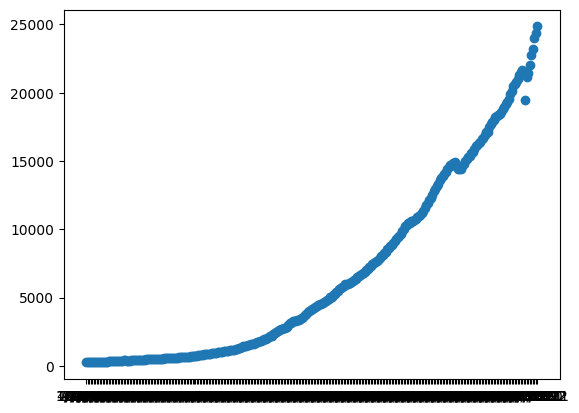

In [18]:
import matplotlib.pyplot as plt     # use: custom data visualization 

# generate a simple scatter plot of the GDP by date: 
plt.scatter(fred_data['DATE'], fred_data['GDP'])

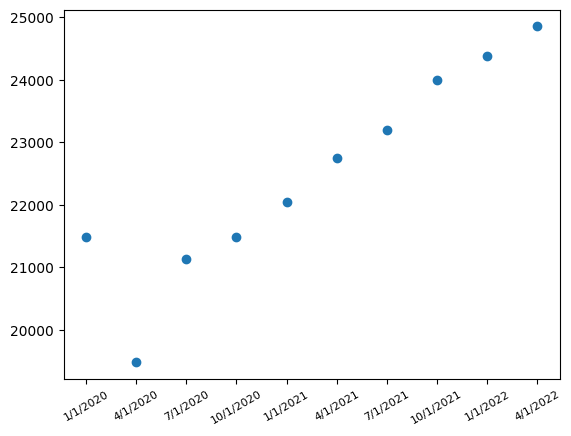

In [26]:
# that's a lot of data - how about just the most recent observations? 
fred_data_subset = fred_data.tail(10)

# let's make sure things are a litte more read-able on the x-axis:
plt.xticks(rotation = 30, fontsize = 8)
plt.scatter(fred_data_subset['DATE'], fred_data_subset['GDP'])

From this quick exploration and visualization exercise, we can see that the FRED data is a timeseries dataset which appears relatively clean and ready for analysis - it contains only two columns: ```DATE``` and ```GDP```. You might be tempted to just go ahead and run with it. 

But, for official and/or frequently-used statistics in particular, it's worth taking a step back zero-ing in on only usability during the data sourcing process. Why? 

* Individuals and groups may publish their own versions of statistics which are usable, but perhaps not official. Using the official source can establish credibility for your research. 

* Or, maybe these off-shoot datasets are based on the official version, but have been processed in a meaningful way. 

    * e.g., the FRED data (found [here](https://fred.stlouisfed.org/series/GDP)) is notated as 'GDP, Billions of Dollars, Seasonally Adjusted Annual Rate'. Maybe this adjustment isn't desirable for your research. <br></br>
  
* Particular fields or subjects may have reputable and established datasets that not only can make your research more credible but also easier through the use of existing analytic tools and techniques others have developed for similar research! 

**TO-DO:** 
* Talk about identifying official source for GDP data 
* Validate/identify source for each of the three (traceback)
* If all official, let's document the diffs (table) and decide which one to use (purpose dependent if all/multiple sources of similar quality/reputability)
  * Criteria for selecting a data author: official-ness/reputability -> data richness | data usability 
* Something blah blah: 'we've picked a specific dataset, but in general, how can we speed up this process? Filter by the type of source (govt, academic, commercial, private individual) -> shortcut for credibility and understanding author incentives...

*callback:* For now, let's explore a few different GDP datasets and consider which one we might choose and why:

##### 1.2.2. *Understanding author incentives and purpose* 

##### 1.2.3. *Validating collected and generated data*